In [1]:
import pandas as pd
import os
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from lib.iux001 import fetch_data, aggregation_data
from lib.aux001 import calc_expression
from lib.cux001 import FactorEvaluate1

In [4]:
method = 'bicso0'
instruments = 'hcb'
period = 5
datasets = ['train', 'val']

In [5]:
total_data = fetch_data(method=method,
                        instruments=instruments,
                        datasets=datasets)

./records/bicso0/hcb/basic/train_data.feather
./records/bicso0/hcb/basic/val_data.feather
./records/bicso0/hcb/returns/train_returns.feather
./records/bicso0/hcb/returns/val_returns.feather


In [6]:
total_data.head()

,trade_time,code,fz002_1_2_1,fz002_10_15_1,fz002_1_2_0,fz002_10_15_0,fz002_5_10_1,fz002_5_10_0,fz002_2_3_1,fz002_2_3_0,...,openint,vwap,nxt1_ret_1h,nxt1_ret_2h,nxt1_ret_3h,nxt1_ret_5h,nxt1_ret_10h,nxt1_ret_15h,time_weight,equal_weight
0,2020-01-02 13:58:00,HC,0.000289,0.000008,0.000198,0.000004,0.000018,0.000011,0.000115,0.000038,...,282113.0,3581.218023,1.421965e-04,0.000056,0.000057,-0.000399,-0.000578,-0.000808,0.000099,0.000085
1,2020-01-02 13:59:00,HC,0.000096,0.000008,0.000198,0.000004,0.000020,0.000010,0.000095,0.000076,...,282112.0,3580.858300,-8.594324e-05,-0.000085,-0.000326,-0.000710,-0.000536,-0.001246,-0.000126,-0.000166
2,2020-01-02 14:00:00,HC,0.000151,0.000008,0.000068,0.000004,0.000022,0.000011,0.000104,0.000089,...,282169.0,3581.367521,7.188597e-07,-0.000240,-0.000455,-0.000741,-0.000591,-0.001465,-0.000156,-0.000232
3,2020-01-02 14:01:00,HC,0.000050,0.000009,0.000068,0.000004,0.000022,0.000010,0.000071,0.000064,...,282368.0,3581.059740,-2.405938e-04,-0.000456,-0.000625,-0.000946,-0.000787,-0.001581,-0.000376,-0.000440
4,2020-01-02 14:02:00,HC,-0.000107,0.000008,-0.000065,0.000003,0.000017,0.000009,-0.000006,0.000010,...,282435.0,3581.062315,-2.156028e-04,-0.000384,-0.000501,-0.000505,-0.000546,-0.001084,-0.000319,-0.000367


In [7]:
total_data.filter(regex="^nxt1").columns.to_list()
nxt1_columns = total_data.filter(regex="^nxt1").columns.to_list()
basic_columns = [
        'close', 'high', 'low', 'open', 'value', 'volume', 'openint'
    ]

regex_pattern = r'^[^_]+_(5|10|15)_.*'
not_columns = total_data.columns[total_data.columns.str.contains(
        regex_pattern)]

factor_columns = [
        col for col in total_data.columns
        if col not in ['trade_time', 'code'] + nxt1_columns + basic_columns +
        not_columns.tolist()
    ][0:100]
'''
factor_columns = [
        'tc017_1_2_1', 'ixy001_1_2_1', 'cr028_1_2_0', 'oi011_1_2_0',
        'dv007_1_2_0', 'cr029_1_2_0', 'tf002_1_2_0', 'cj003_1_2_0',
        'oi026_1_2_0', 'tc010_1_2_0', 'tf019_1_2_0', 'tn009_1_2_1_1',
        'cr015_1_2_0', 'tc010_1_2_1', 'tn009_1_2_1_4', 'cr056_1_2_1',
        'cr057_1_2_1', 'oi027_1_2_0', 'tn006_1_2_0', 'cr018_1_2_0',
        'cr035_1_2_0', 'tn008_1_2_0_1', 'tn008_1_2_1_1', 'rv008_1_2_1_2',
        'ixy003_1_2_0', 'tc013_1_2_0', 'oi029_2_3_0', 'tn005_1_2_0',
        'cr009_1_2_0', 'cr009_1_2_1', 'oi001_1_2_0', 'oi013_1_2_0',
        'tf006_1_2_0', 'cr042_1_2_0', 'tn003_1_1_2_3_1', 'tc017_1_2_0',
        'dv003_1_2_0', 'cr056_1_2_0', 'cr057_1_2_0', 'cr027_1_2_1',
        'oi001_1_2_1', 'tn008_1_2_0_4', 'tn003_2_1_2_3_0', 'rv010_1_2_1_2',
        'iv011_1_2_0', 'tc005_1_1_2_0', 'tc012_1_1_2_0', 'tv017_1_2_0',
        'tc014_1_1_2_0', 'tc006_1_2_0', 'rv008_1_2_0_2', 'iv008_1_2_0',
        'tv006_1_2_1', 'cr006_1_2_0', 'oi041_2_3_1', 'cj012_1_2_0',
        'tc004_1_1_2_0', 'db006_1_2_0', 'tc008_1_2_0', 'tn008_1_2_1_4',
        'tf001_1_2_0', 'tv001_1_2', 'dv011_1_2_0', 'iv007_2_3_0',
        'xy005_1_2_1', 'xy004_1_2_1', 'tn001_1_2_1', 'rv006_1_2_1_2',
        'iv010_1_2_0', 'cr007_1_2_1', 'ixy013_1_2_0', 'dv009_1_2_0',
        'iv007_2_3_1', 'rv006_1_2_0_2', 'dv001_2_3_1', 'oi042_1_2_0',
        'tn001_1_2_0', 'cr019_1_2_0', 'cr008_1_2_0', 'cr008_1_2_1',
        'iv007_5_10_1', 'cr049_1_2_0', 'cj011_1_2_0', 'oi042_1_2_1',
        'oi008_1_2_1', 'tc016_1_1_2_1', 'cj011_1_2_1', 'cj006_1_2_1',
        'oi041_2_3_0', 'ixy007_1_2_1', 'tc001_2_3_0', 'tn009_1_2_0_1',
        'cr047_1_2_0', 'cr047_1_2_1', 'tv019_1_2_1', 'tn009_1_2_1_2',
        'tn009_1_2_1_3', 'dv003_1_2_1', 'rv002_1_2_1_2', 'ixy014_1_2_1',
        'iv011_1_2_1', 'tn008_1_2_0_3', 'oi004_1_2_1', 'rv010_2_3_0_2',
        'rv003_1_2_1_2', 'oi025_1_2_0', 'tn008_1_2_1_3', 'db006_1_2_1',
        'ixy008_1_2_1', 'oi008_1_2_0', 'db007_1_2_1', 'dv002_1_2_1',
        'iv007_1_2_0', 'tn009_1_2_0_4', 'cr042_1_2_1', 'rv005_1_2_1_2',
        'cr027_1_2_0', 'tn009_1_2_0_2', 'dv003_2_3_1', 'tn009_1_2_0_3',
        'tc007_1_2_1', 'tc007_1_2_0', 'cr061_1_2_1', 'iv007_10_15_1',
        'tc012_1_1_2_1', 'tv017_1_2_1', 'tc005_1_1_2_1', 'oi039_1_2_1',
        'tc006_1_2_1', 'tc014_1_1_2_1', 'tv019_2_3_1', 'tn003_2_1_2_3_1',
        'iv010_1_2_1', 'tv011_1_1_2_1', 'oi014_2_3_1', 'cr020_1_2_0',
        'tn008_1_2_1_2', 'rv004_2_3_1_2', 'rv005_1_2_1_1', 'tv018_1_2_0',
        'iv008_1_2_1', 'tn008_2_3_1_2', 'cr041_2_2_3_0', 'tf006_1_2_1',
        'rv005_1_2_0_2', 'rv002_2_3_0_2', 'oi032_2_2_3_1', 'rv004_2_3_0_2',
        'tv002_1_1_2_1', 'rv004_1_2_1_2', 'rv003_2_3_1_2', 'oi037_1_2_1',
        'oi001_2_3_1', 'rv002_2_3_1_2', 'tn008_2_3_1_4', 'iv012_1_2_1',
        'tn004_1_2_1', 'oi032_2_2_3_0', 'oi034_1_2_1', 'rv001_2_3_0_2',
        'cr017_1_2_0', 'tv015_1_2_0', 'xy005_1_2_0', 'xy004_1_2_0',
        'oi016_1_2_1', 'ixy001_1_2_0', 'tc015_1_2_1', 'tn008_2_3_1_3',
        'oi032_1_1_2_1', 'oi023_1_2_1', 'tv004_1_2_1', 'ixy014_1_2_0',
        'db005_1_2_1', 'tv002_2_2_3_1', 'oi045_1_2_1', 'ixy006_1_2_1',
        'tv008_1_2_0', 'oi016_1_2_0', 'rv003_2_3_0_2', 'tc003_1_2_1',
        'oi022_1_2_1', 'tc013_1_2_1', 'tc017_2_3_1', 'tn008_1_2_0_2',
        'cr012_1_2_0', 'tv014_1_2_1', 'tc010_2_3_1', 'tn006_1_2_1',
        'iv007_1_2_1', 'cr012_1_2_1', 'oi046_1_2_1', 'fz002_1_2_1',
        'oi040_2_3_0', 'tc016_2_2_3_0', 'dv005_1_2_1', 'ha004_2_3_1',
        'db007_1_2_0', 'dv006_1_2_1', 'tv011_2_2_3_1', 'tn008_2_3_0_2',
        'gd002_1_2_1', 'oi033_1_2_1', 'tv002_1_1_2_0', 'oi042_2_3_1',
        'oi041_1_2_1', 'rv004_1_2_1_1', 'oi031_1_2_1', 'tc016_1_1_2_0',
        'tv007_1_2_1', 'cj006_1_2_0', 'cr033_1_2_1', 'cr049_1_2_1',
        'dv001_2_3_0', 'cj010_1_2_1', 'ixy003_1_2_1', 'cr048_2_3_1',
        'tv018_1_2_1', 'oi025_1_2_1', 'cr007_2_3_1', 'oi003_1_2_1',
        'tf001_1_2_1', 'ixy007_1_2_0', 'rv006_2_3_1_2', 'oi036_1_2_1',
        'rv005_1_2_0_1'
    ][0:100]
'''

"\nfactor_columns = [\n        'tc017_1_2_1', 'ixy001_1_2_1', 'cr028_1_2_0', 'oi011_1_2_0',\n        'dv007_1_2_0', 'cr029_1_2_0', 'tf002_1_2_0', 'cj003_1_2_0',\n        'oi026_1_2_0', 'tc010_1_2_0', 'tf019_1_2_0', 'tn009_1_2_1_1',\n        'cr015_1_2_0', 'tc010_1_2_1', 'tn009_1_2_1_4', 'cr056_1_2_1',\n        'cr057_1_2_1', 'oi027_1_2_0', 'tn006_1_2_0', 'cr018_1_2_0',\n        'cr035_1_2_0', 'tn008_1_2_0_1', 'tn008_1_2_1_1', 'rv008_1_2_1_2',\n        'ixy003_1_2_0', 'tc013_1_2_0', 'oi029_2_3_0', 'tn005_1_2_0',\n        'cr009_1_2_0', 'cr009_1_2_1', 'oi001_1_2_0', 'oi013_1_2_0',\n        'tf006_1_2_0', 'cr042_1_2_0', 'tn003_1_1_2_3_1', 'tc017_1_2_0',\n        'dv003_1_2_0', 'cr056_1_2_0', 'cr057_1_2_0', 'cr027_1_2_1',\n        'oi001_1_2_1', 'tn008_1_2_0_4', 'tn003_2_1_2_3_0', 'rv010_1_2_1_2',\n        'iv011_1_2_0', 'tc005_1_1_2_0', 'tc012_1_1_2_0', 'tv017_1_2_0',\n        'tc014_1_1_2_0', 'tc006_1_2_0', 'rv008_1_2_0_2', 'iv008_1_2_0',\n        'tv006_1_2_1', 'cr006_1_2_0', 'oi041_2_3

In [8]:
total_data = total_data[['trade_time', 'code'] + factor_columns + ["nxt1_ret_{}h".format(period)]]
total_data.head()

,trade_time,code,fz002_1_2_1,fz002_1_2_0,fz002_2_3_1,fz002_2_3_0,gd002_1_2_1,gd002_1_2_0,gd002_2_3_1,gd002_2_3_0,...,tc015_1_2_0,tc015_2_3_1,tc015_2_3_0,tc016_1_1_2_0,tc016_2_2_3_0,tc016_2_2_3_1,tc016_1_1_2_1,tc017_1_2_1,tc017_1_2_0,nxt1_ret_5h
0,2020-01-02 13:58:00,HC,0.000289,0.000198,0.000115,0.000038,0.222913,0.290722,0.570958,0.795482,...,5000.0,2292.554953,1666.666667,41855.670103,-6781.431208,1940.713224,16472.146289,-61.878450,0.0,-0.000399
1,2020-01-02 13:59:00,HC,0.000096,0.000198,0.000095,0.000076,0.709239,0.417936,0.636191,0.560509,...,5000.0,1887.407616,3333.333333,-16412.859560,3805.359545,503.789533,-6125.243536,-61.878450,0.0,-0.000710
2,2020-01-02 14:00:00,HC,0.000151,0.000068,0.000104,0.000089,0.255243,0.513514,0.448296,0.414724,...,5000.0,3412.969410,5000.000000,-2702.702703,4280.551416,-1207.989032,-3982.474340,-10.712987,0.0,-0.000741
3,2020-01-02 14:01:00,HC,0.000050,0.000068,0.000071,0.000064,0.820953,0.621971,0.647113,0.514593,...,5000.0,2529.573239,5000.000000,24394.184168,-2664.182238,4010.890005,13938.415971,1682.632186,0.0,-0.000946
4,2020-01-02 14:02:00,HC,-0.000107,-0.000065,-0.000006,0.000010,0.940211,1.000000,0.800473,0.742511,...,0.0,1539.149464,3333.333333,-6648.199446,10250.804449,3445.331177,-89.122919,1113.277574,1000.0,-0.000505


In [51]:
expression = "MQUANTILE(10,MDIFF(8,MDIFF(8,'tc003_2_3_0')))"

In [52]:
factor_data = calc_expression(expression=expression,
                              total_data=total_data.set_index('trade_time'))

In [53]:
factor_data.head()

,trade_time,transformed,code
0,2020-01-02 13:59:00,1.000000,HC
1,2020-01-02 14:00:00,1.000000,HC
2,2020-01-02 14:01:00,0.333333,HC
3,2020-01-02 14:02:00,NaN,HC
4,2020-01-02 14:03:00,NaN,HC


In [54]:
dt = aggregation_data(factor_data=factor_data,
                      returns_data=total_data,
                      period=period)

In [55]:
dt.tail()

,trade_time,transformed,code,nxt1_ret_5h
381287,2024-09-04 09:10:00,0.666667,HC,0.001289
381292,2024-09-04 09:15:00,0.777778,HC,-0.003799
381302,2024-09-04 09:25:00,0.888889,HC,0.001668
381307,2024-09-04 09:30:00,0.555556,HC,0.002788
381312,2024-09-04 09:35:00,0.555556,HC,0.000930


In [56]:
evaluate1 = FactorEvaluate1(factor_data=dt,
                                factor_name='transformed',
                                ret_name='nxt1_ret_{0}h'.format(period),
                                roll_win=240,
                                fee=0.000,
                                scale_method='roll_zscore',
                                expression=expression)

In [57]:
stats_dt = evaluate1.run()

In [58]:
stats_dt

{'total_ret': 0.8818062685390591,
 'avg_ret': 9.796221551560232e-06,
 'max_dd': -0.0740840814339847,
 'calmar': 11.902776567795126,
 'sharpe1': 0.016322557598395685,
 'sharpe2': 1.6125970993839303,
 'turnover': 0.41385427789880436,
 'win_rate': 0.5072892040977147,
 'profit_ratio': 1.0599874655489825,
 'ic_mean': -0.021983745811342697,
 'ic_std': 0.06506644891135337,
 'ic_ir': -0.33786607659030826,
 'factor_autocorr': -0.12700655542895006,
 'ret_autocorr': 0.03800716131164808}

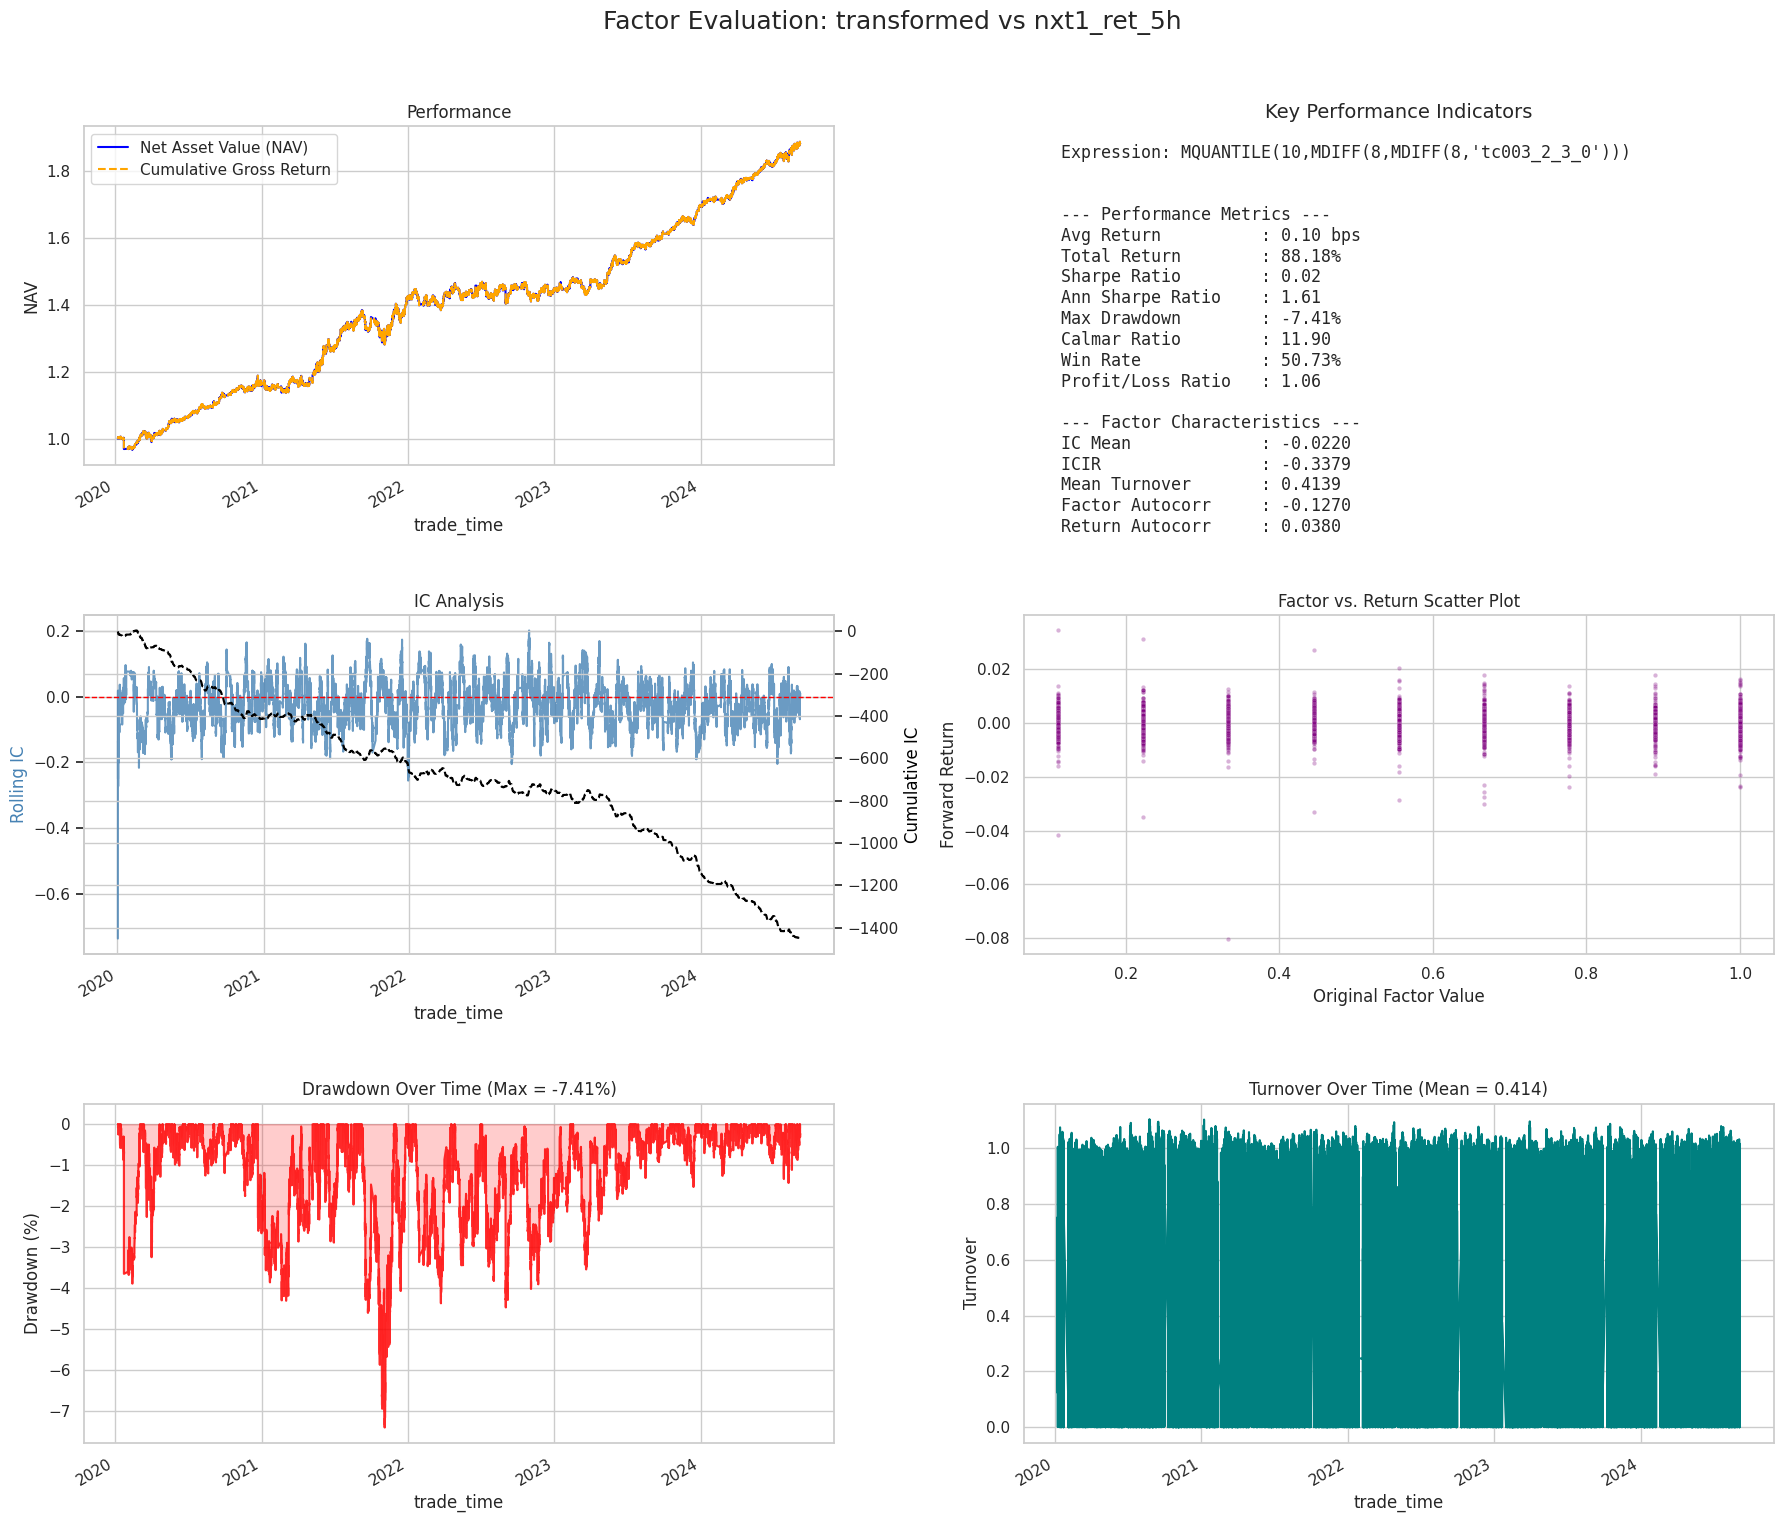

In [59]:
evaluate1.plot_results()